<a href="https://colab.research.google.com/github/CARC2806/TI3002C.101/blob/main/A00833458_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [35]:
df = pd.read_csv('weatherAUS.csv')

In [36]:
df.dropna(inplace=True)
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [37]:
X = df.drop(columns=['RainTomorrow','Date'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
model = LogisticRegression(max_iter=5500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5500)

In [39]:
y_pred = model.predict(X_test)

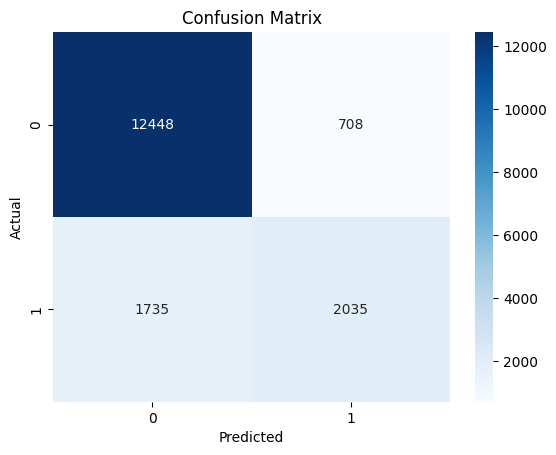

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     13156
           1       0.74      0.54      0.62      3770

    accuracy                           0.86     16926
   macro avg       0.81      0.74      0.77     16926
weighted avg       0.85      0.86      0.85     16926



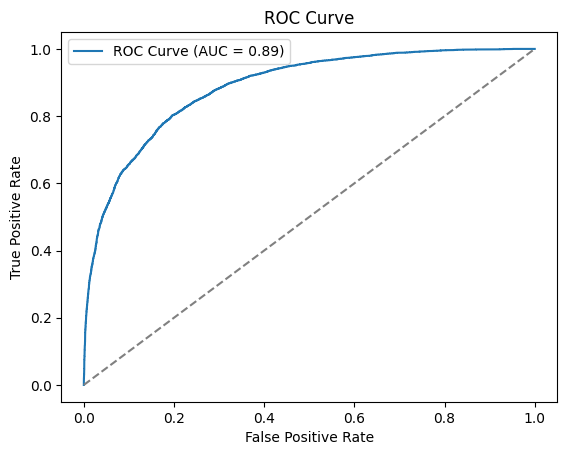

In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# ROC Curve
if len(df['RainTomorrow'].unique()) == 2:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

The model is generally accurate, with an overall accuracy of 86%. It does a better job predicting when it won’t rain compared to predicting rainy days, as it identifies only about half of the actual rainy days correctly. This means the model is more reliable for forecasting clear weather than for accurately predicting rain.